In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")
import re


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Load the datafame

In [3]:
df=pd.read_csv("/content/Grade 5  - Dataset - Sheet1.csv", encoding="utf-8")
df.head(10)

,Correct Sentenes,Wrong sentences
0,ගුරුවරයා පාඩම විචිත්‍ර ලෙස ඉගැන්වීය.,පාඩම ගුරුවරයා විචිත්‍ර ලෙස ඉගැන්වීය.
1,මිනිසුන් ධර්මය නිතර පිළිගන්නවා වෙති.,ධර්මය මිනිසුන් වෙති නිතර පිළිගන්නවා.
2,සූර්යයා උදෑසන පූර්ව දිශාවෙන් නැඟුණේය.,උදෑසන සූර්යයා දිශාවෙන් නැඟුණේය පූර්ව.
3,රාජ්‍යය වෙත නව සභාවක් පත් කරන ලදී.,නව සභාවක් රාජ්‍යය වෙත ලදී පත් කරන.
4,උන්වහන්සේ විශාල ග්‍රන්ථයක් නිර්මාණය කළසේක.,විශාල ග්‍රන්ථයක් උන්වහන්සේ කළසේක නිර්මාණය.
5,සිසුහු ක්‍රීඩාවේ දක්ෂතාව මැනවින් පෙන්වූහ.,දක්ෂතාව සිසුහු ක්‍රීඩාවේ පෙන්වූහ මැනවින්.
6,නගරය අතිශය ධනවත් ව්‍යාපාරිකයෙකු විය.,අතිශය ධනවත් ව්‍යාපාරිකයෙකු නගරය විය.
7,ජනතාව සියලු දුක්ඛිත තත්ත්වයන්ට මුහුණ දුන්හ.,දුක්ඛිත තත්ත්වයන්ට සියලු ජනතාව මුහුණ දුන්හ.
8,ලෝකයේ ප්‍රගතිය සඳහා නිරතුරුව යෙදේ.,නිරතුරුව ලෝකයේ ප්‍රගතිය සඳහා යෙදේ.
9,භික්ෂූන් විහාරයේ නිශ්ශබ්දව ධර්මය සාකච්ඡා කළහ.,ධර්මය භික්ෂූන් නිශ්ශබ්දව විහාරයේ සාකච්ඡා කළහ.


In [ ]:
df.to_csv("/content/Grade 5  - Dataset - Sheet1.csv", encoding="utf-8-sig", index=False)

### Create the excel file

In [5]:
from openpyxl import Workbook

wb = Workbook()
ws = wb.active

for row in df.values:
    ws.append(list(row))

wb.save("5_sinhala1.xlsx")


In [6]:
df=pd.read_csv("/content/5_sinhala1.csv", encoding="utf-8")
df.head(10)


,Sentences,class
0,ගුරුවරයා පාඩම විචිත්‍ර ලෙස ඉගැන්වීය.,correct
1,මිනිසුන් ධර්මය නිතර පිළිගන්නවා වෙති.,correct
2,සූර්යයා උදෑසන පූර්ව දිශාවෙන් නැඟුණේය.,correct
3,රාජ්‍යය වෙත නව සභාවක් පත් කරන ලදී.,correct
4,උන්වහන්සේ විශාල ග්‍රන්ථයක් නිර්මාණය කළසේක.,correct
5,සිසුහු ක්‍රීඩාවේ දක්ෂතාව මැනවින් පෙන්වූහ.,correct
6,නගරය අතිශය ධනවත් ව්‍යාපාරිකයෙකු විය.,correct
7,ජනතාව සියලු දුක්ඛිත තත්ත්වයන්ට මුහුණ දුන්හ.,correct
8,ලෝකයේ ප්‍රගතිය සඳහා නිරතුරුව යෙදේ.,correct
9,භික්ෂූන් විහාරයේ නිශ්ශබ්දව ධර්මය සාකච්ඡා කළහ.,correct


In [7]:
df.isnull().sum()
df.isna()
df.dropna(axis=0,inplace=True)
df.head()
print(df["class"].value_counts())

class
correct      1072
incorrect    1072
Name: count, dtype: int64


### Find max word count

In [8]:
# Count words in each sentence
df["word_count"] = df["Sentences"].apply(lambda x: len(str(x).split()))

# Select sentences with max 4 words
df = df[df["word_count"] <= 6]

# Final x and y
x_filtered = df["Sentences"].tolist()
y_filtered = df["class"].tolist()

# Optional: drop helper column
df = df.drop(columns=["word_count"])

In [9]:
df

,Sentences,class
0,ගුරුවරයා පාඩම විචිත්‍ර ලෙස ඉගැන්වීය.,correct
1,මිනිසුන් ධර්මය නිතර පිළිගන්නවා වෙති.,correct
2,සූර්යයා උදෑසන පූර්ව දිශාවෙන් නැඟුණේය.,correct
4,උන්වහන්සේ විශාල ග්‍රන්ථයක් නිර්මාණය කළසේක.,correct
5,සිසුහු ක්‍රීඩාවේ දක්ෂතාව මැනවින් පෙන්වූහ.,correct
...,...,...
2138,හොඳ පාඩමක් විය මේ අත්දැකීම අපට.,incorrect
2139,නිතරම ශක්තියක් වෙති මගේ මිතුරෝ මට.,incorrect
2142,සැලසිය යුතුය දරුවන්ට ආරක්ෂිත අනාගතයක්.,incorrect
2144,හොඳ අදහස් ඉදිරිපත් කරයි ඔහු නිතරම.,incorrect


### Recorrec the sentence

In [10]:
x_list=df["Sentences"]
y_list=df["class"]

In [11]:
def recorrect_sentence(sentence):
    # 1. Split the text
    words = sentence.split(" ")

    # 2. Check if last word length is 1 or 2 (to handle "ය" or "ය.")
    last_word = words[-1]

    if len(last_word.replace(".", "")) == 1:
        # 3. Combine last word with previous word
        words[-2] = words[-2] + last_word
        words.pop()  # remove last word

    return " ".join(words)




# Apply correction
corrected_list = [recorrect_sentence(text) for text in x_list]

# Output
for original, corrected in zip(x_list, corrected_list):
     print("Original :", original)
     print("Corrected:", corrected)
     print("-" * 40)


Original : ගුරුවරයා පාඩම විචිත්‍ර ලෙස ඉගැන්වීය.
Corrected: ගුරුවරයා පාඩම විචිත්‍ර ලෙස ඉගැන්වීය.
----------------------------------------
Original : මිනිසුන් ධර්මය නිතර පිළිගන්නවා වෙති.
Corrected: මිනිසුන් ධර්මය නිතර පිළිගන්නවා වෙති.
----------------------------------------
Original : සූර්යයා උදෑසන පූර්ව දිශාවෙන් නැඟුණේය.
Corrected: සූර්යයා උදෑසන පූර්ව දිශාවෙන් නැඟුණේය.
----------------------------------------
Original : උන්වහන්සේ විශාල ග්‍රන්ථයක් නිර්මාණය කළසේක.
Corrected: උන්වහන්සේ විශාල ග්‍රන්ථයක් නිර්මාණය කළසේක.
----------------------------------------
Original : සිසුහු ක්‍රීඩාවේ දක්ෂතාව මැනවින් පෙන්වූහ.
Corrected: සිසුහු ක්‍රීඩාවේ දක්ෂතාව මැනවින් පෙන්වූහ.
----------------------------------------
Original : නගරය අතිශය ධනවත් ව්‍යාපාරිකයෙකු විය.
Corrected: නගරය අතිශය ධනවත් ව්‍යාපාරිකයෙකු විය.
----------------------------------------
Original : ජනතාව සියලු දුක්ඛිත තත්ත්වයන්ට මුහුණ දුන්හ.
Corrected: ජනතාව සියලු දුක්ඛිත තත්ත්වයන්ට මුහුණ දුන්හ.
----------------------------------------
Ori

In [12]:
def get_max_word_count(text_list):
    max_count = 0
    for text in text_list:
        words = text.split()
        if len(words) > max_count:
            max_count = len(words)
    return max_count


def get_min_word_count(text_list):
    if not text_list:
        return 0  # Return 0 if the list is empty

    min_count = float('inf')  # Initialize with a very large number
    for text in text_list:
        words = text.split()
        if len(words) < min_count:
            min_count = len(words)
    return min_count




In [13]:

# Get the maximum word count from pre_text_list
max_word_count = get_max_word_count(corrected_list)
print(f"Maximum word count in text_list: {max_word_count}")

Maximum word count in text_list: 6


## Preprocess

In [14]:
import re

def pre_text(tweet):
    ''' Convert sentence into indexed word sequence '''

    # convert to lowercase (safe for Sinhala)
    text = tweet.lower()

    # remove punctuation
    text = re.sub(r'[,.!?#@$%&]', '', text)

    # tokenize
    words = text.split()

    # add word index labels
    indexed_words = []
    for i, word in enumerate(words, start=1):
        indexed_words.append(f"word{i} {word}")

    # add final word index (word{n+1})
    #indexed_words.append(f"word{len(words) + 1}")
    indexed_words.append("end")

    final_text = " ".join(indexed_words)
    return final_text

print("\nOriginal tweet ->", corrected_list[850])
print("\nProcessed tweet ->", pre_text(corrected_list[850]))


Original tweet -> දුක්ඛිත තත්ත්වයන්ට සියලු ජනතාව මුහුණ දුන්හ.

Processed tweet -> word1 දුක්ඛිත word2 තත්ත්වයන්ට word3 සියලු word4 ජනතාව word5 මුහුණ word6 දුන්හ end


In [15]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text,corrected_list))

In [16]:
pre_text_list= [s for s in pre_text_list if len(s.split()) > 4]

print(pre_text_list)


['word1 ගුරුවරයා word2 පාඩම word3 විචිත්\u200dර word4 ලෙස word5 ඉගැන්වීය end', 'word1 මිනිසුන් word2 ධර්මය word3 නිතර word4 පිළිගන්නවා word5 වෙති end', 'word1 සූර්යයා word2 උදෑසන word3 පූර්ව word4 දිශාවෙන් word5 නැඟුණේය end', 'word1 උන්වහන්සේ word2 විශාල word3 ග්\u200dරන්ථයක් word4 නිර්මාණය word5 කළසේක end', 'word1 සිසුහු word2 ක්\u200dරීඩාවේ word3 දක්ෂතාව word4 මැනවින් word5 පෙන්වූහ end', 'word1 නගරය word2 අතිශය word3 ධනවත් word4 ව්\u200dයාපාරිකයෙකු word5 විය end', 'word1 ජනතාව word2 සියලු word3 දුක්ඛිත word4 තත්ත්වයන්ට word5 මුහුණ word6 දුන්හ end', 'word1 ලෝකයේ word2 ප්\u200dරගතිය word3 සඳහා word4 නිරතුරුව word5 යෙදේ end', 'word1 භික්ෂූන් word2 විහාරයේ word3 නිශ්ශබ්දව word4 ධර්මය word5 සාකච්ඡා word6 කළහ end', 'word1 උගත් word2 පණ්ඩිතයන් word3 ප්\u200dරඥාව word4 මනාව word5 පරිශීලනය word6 කළෝය end', 'word1 සංචාරකයා word2 රමණීය word3 දර්ශන word4 බැලීමට word5 කන්ද word6 නැග්ගේය end', 'word1 කාර්යාලයේ word2 සිටින word3 සියල්ලෝම word4 නව word5 ව්\u200dයාපෘතිය word6 පිළිගනිති end', 'word1 ද

In [17]:
print(pre_text_list)

['word1 ගුරුවරයා word2 පාඩම word3 විචිත්\u200dර word4 ලෙස word5 ඉගැන්වීය end', 'word1 මිනිසුන් word2 ධර්මය word3 නිතර word4 පිළිගන්නවා word5 වෙති end', 'word1 සූර්යයා word2 උදෑසන word3 පූර්ව word4 දිශාවෙන් word5 නැඟුණේය end', 'word1 උන්වහන්සේ word2 විශාල word3 ග්\u200dරන්ථයක් word4 නිර්මාණය word5 කළසේක end', 'word1 සිසුහු word2 ක්\u200dරීඩාවේ word3 දක්ෂතාව word4 මැනවින් word5 පෙන්වූහ end', 'word1 නගරය word2 අතිශය word3 ධනවත් word4 ව්\u200dයාපාරිකයෙකු word5 විය end', 'word1 ජනතාව word2 සියලු word3 දුක්ඛිත word4 තත්ත්වයන්ට word5 මුහුණ word6 දුන්හ end', 'word1 ලෝකයේ word2 ප්\u200dරගතිය word3 සඳහා word4 නිරතුරුව word5 යෙදේ end', 'word1 භික්ෂූන් word2 විහාරයේ word3 නිශ්ශබ්දව word4 ධර්මය word5 සාකච්ඡා word6 කළහ end', 'word1 උගත් word2 පණ්ඩිතයන් word3 ප්\u200dරඥාව word4 මනාව word5 පරිශීලනය word6 කළෝය end', 'word1 සංචාරකයා word2 රමණීය word3 දර්ශන word4 බැලීමට word5 කන්ද word6 නැග්ගේය end', 'word1 කාර්යාලයේ word2 සිටින word3 සියල්ලෝම word4 නව word5 ව්\u200dයාපෘතිය word6 පිළිගනිති end', 'word1 ද

In [18]:
len(pre_text_list)

1686

In [19]:
max_word_count = get_max_word_count(pre_text_list)
print(f"Maximum word count in pre_text_list: {max_word_count}")

Maximum word count in pre_text_list: 13


In [20]:


# Get the minimum word count from pre_text_list
min_word_count = get_min_word_count(pre_text_list)
print(f"Minimum word count in pre_text_list: {min_word_count}")

Minimum word count in pre_text_list: 9


## tokenize

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 1900
max_len=13

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['Sentences'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 උගත් පණ්ඩිතයන් ප්‍රඥාව මනාව පරිශීලනය කළෝය.
Before Tokenization & Padding 
 word1 දරුවන් word2 ගමේ word3 ඇළ word4 අසල word5 සෙල්ලම් word6 කළහ end
After Tokenization & Padding 
 [  1 426   2 164   3 427   4 399   6 215   7  19   5]


In [22]:
X[10]

array([  1, 766,   2, 767,   3, 421,   4, 422,   6, 423,   7, 768,   5],
      dtype=int32)

In [23]:
X[50]

array([  1, 230,   2, 115,   3, 319,   4,  20,   6, 320,   5,   0,   0],
      dtype=int32)

In [24]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 1826 unique tokens.


### Define X and y

In [25]:
from tensorflow.keras.utils import to_categorical
# softmax
# Map labels to integers
label_map = {"incorrect": 0, "correct": 1}  # assign 0/1
y_int= y_list.map(label_map).astype(int).values
print("Integer labels:", y_int)

Integer labels: [1 1 1 ... 0 0 0]


#### softmax

In [26]:
y_softmax= to_categorical(y_int, num_classes=2)
print("Softmax one-hot labels shape:", y_softmax.shape)
print(y_softmax[:5])

Softmax one-hot labels shape: (1686, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


#### sigmoid

In [ ]:
# sigmoid
y_binary = y_int.reshape(-1, 1)  # shape (num_samples, 1)
print("Binary labels shape:", y_binary.shape)
print(y_binary[:5])


Binary labels shape: (828, 1)
[[1]
 [1]
 [1]
 [1]
 [1]]


## Training testing split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y_softmax, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)



In [28]:
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)
print("x_test:",X_test.shape)
print("y_test ;",y_test.shape)
print(X_train[:5])
print(y_train[:5])

X_train : (1011, 13)
y_train : (1011, 2)
x_test: (338, 13)
y_test ; (338, 2)
[[   1  176    2  136    3  493    4   42    6  234    5    0    0]
 [   1  868    2   11    3  165    4   66    6   50    7   13    5]
 [   1  719    2  108    3   59    4    9    6   54    7 1666    5]
 [   1  611    2 1134    3   52    4 1135    6   58    5    0    0]
 [   1  118    2  232    3  233    4  346    6  855    7  856    5]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [29]:
print(X_val.shape)
print(y_val.shape)

(337, 13)
(337, 2)


## Training model

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Model 1 architecture

In [31]:
vocab_size = 1900
epochs=10
embedding_size = 13
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8


sgd = SGD(learning_rate=learning_rate, momentum=momentum, nesterov=False)


# Sequential model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(8)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))
print(model.summary())



# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_shape=(max_len,)))
# model.add(Conv1D(filters=4, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(8, return_sequences=True))
# model.add(Bidirectional(LSTM(8)))
# model.add(Dropout(0.4))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 13, 13)         │        24,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 13, 4)          │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,726 (100.49 KB)

 Trainable params: 25,726 (100.49 KB)

 Non-trainable params: 0 (0.00 B)

None


## save model

In [32]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_sentence_5.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_sentence_5.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'sentence_5.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)



In [34]:
from tensorflow.keras.optimizers import Adam

# Compile model

# Compile with classification loss
model.compile(loss='categorical_crossentropy', optimizer= sgd,metrics=['accuracy', Precision(), Recall()])
# Compile with binary loss
#model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])


In [35]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

epochs=50


# # Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=16, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])



Epoch 1/50


/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5131 - loss: 0.6961 - precision: 0.5131 - recall: 0.5131
Epoch 1: val_loss improved from inf to 0.70406, saving model to sentence_5.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.5131 - loss: 0.6962 - precision: 0.5131 - recall: 0.5131 - val_accuracy: 0.4866 - val_loss: 0.7041 - val_precision: 0.4866 - val_recall: 0.4866
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.4851 - loss: 0.7071 - precision: 0.4851 - recall: 0.4851
Epoch 2: val_loss improved from 0.70406 to 0.69539, saving model to sentence_5.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 194ms/step - accuracy: 0.4850 - loss: 0.7071 - precision: 0.4850 - recall: 0.4850 - val_accuracy: 0.4866 - val_loss: 0.6954 - val_precision: 0.4866 - val_recall: 0.4866
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.4938 - loss: 0.6959 - precision: 0.4938 - recall: 0.4938
Epoch 3: val_loss did not improve from 0.69539
64/64 ━━━━━━━━━━━━━━━━━━━━ 13

## Models evaluation

In [36]:
from keras.models import load_model
#Load model
model = load_model(r'/content/sentence_5.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8728
Precision : 0.8728
Recall    : 0.8728


## Confution metrix

Model 1
 2/11 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


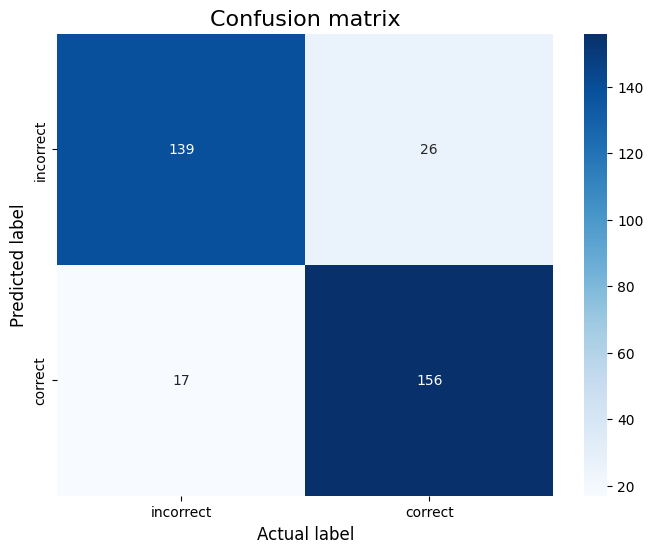

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['incorrect', 'correct']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
print("Model 1")
plot_confusion_matrix(model, X_test, y_test)


In [38]:
def pre_text_grammer(tweet):
    ''' Convert sentence into indexed word sequence '''

    # convert to lowercase (safe for Sinhala)
    text = tweet.lower()

    # remove punctuation
    text = re.sub(r'[,.!?#@$%&]', '', text)

    # tokenize
    words = text.split()

    # add word index labels
    indexed_words = []
    for i, word in enumerate(words, start=1):
        indexed_words.append(f"word{i} {word}")

    # add final word index (word{n+1})
    #indexed_words.append(f"word{len(words) + 1}")
    indexed_words.append("end")

    final_text = " ".join(indexed_words)
    return final_text




In [45]:
from keras.models import load_model

# Load model
model_new = load_model('/content/sentence_5.keras')

# loading tokenizer
with open('/content/tokenizer_sentence_5.pickle', 'rb') as handle:
    tokenizer_new = pickle.load(handle)

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''


    sentiment_classes = ['incorrect', 'correct']
    max_len=13
    final_text=pre_text_grammer(text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer_new.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    new_sequences = np.array(xt)

    # Do the prediction using the loaded model
    yt = model_new.predict(new_sequences).argmax(axis=1)
    print(yt)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])





In [47]:
predict_class("ඔහු සිය කුඩා අධ්‍යාපන කරුණු පසුපස ගියේය.")
predict_class("සියලු ජනතාව සමෘද්ධිය සඳහා සක්‍රීයව දායක වෙති.")
predict_class("තොරතුරු දෛනිකව පුවත්පත් මගින් ලැබෙන්නේය.")
predict_class("සූර්යයා උදෑසන උදාවන විට මහා අලෝකයක් පැතිරෙන්නේය.")
predict_class("තරයේ කියා සිටියාය ඇය එලෙස.")
predict_class("සාර්ථකව ආරම්භ කළෙමු අපි නව ව්‍යාපෘතියක්.")
predict_class("දරුවෝ ක්‍රීඩා කළහ සවස ගමේ.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
[1]
The predicted sentiment is correct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
[0]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
[0]
The predicted sentiment is incorrect
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
[0]
The predicted sentiment is incorrect
